# (Ford GoBike System Data Exploration)
## by (Eman Abdelhalim)

## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# high-level overview of data shape and composition
print(df.shape)
print(df.info())
df.head()

(183412, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  floa

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# descriptive statistics for numeric variables
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### What is the structure of your dataset?

> there are 183412 rides in the dataset with 16 features(duration_sec,start_time, end_time, start_station_id, start_station_name, start_station_latitude,	start_station_longitude,	end_station_id, end_station_name, 	end_station_latitude, 	end_station_longitude, 	bike_id, user_type,	member_birth_year, 	member_gender, 	bike_share_for_all_trip) most variables are categories and the rest of variables are numeric  

### What is/are the main feature(s) of interest in your dataset?

> I am interseted in figuring out what features are best for answering my questions 
 - which are the top 5 stations with the most starts?
 - Most popular trips (based on start station and stop station)
 - How long does the average trip takes ?
 - What is the busiest bike in San Francisco Bay area in february 2019? How many times was it used? How many second was it in use?
 - Does the average trip duration depend on if a user is a subscriber or customer?
 - when are most trips taken in terms of time of day or day of week?
 
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>  duration_sec, start_time, end_time, start_station_name,end_station_name, bike_id, user_type, 	member_gender these features that will help me in my investigation to get the answers of my questions 

### Cleaning data

change column with dates to datetime type

In [5]:
#convert column with dates to datetime type
df['start_time'] = pd.to_datetime(df['start_time'], errors='coerce')
df['end_time'] = pd.to_datetime(df['end_time'], errors='coerce')

In [6]:
#convert start_station_id and end_station_id to strings 
df['start_station_id']= df['start_station_id'].astype(str)
df['end_station_id']= df['end_station_id'].astype(str)
df['bike_id']= df['bike_id'].astype(str)

In [7]:
pd.to_numeric(df['start_station_id'],errors='coerce').isnull().sum()


197

In [8]:
pd.to_numeric(df['end_station_id'],errors='coerce').isnull().sum()


197

In [9]:
df['start_station_name'].isnull().sum()

197

In [10]:
df['end_station_name'].isnull().sum()

197

In [11]:
df['member_gender'].isnull().sum()

8265

In [12]:
df.dropna(inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

In [14]:
df['start_station_name'].value_counts()

Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                           2952
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2620
                                                             ... 
Willow St at Vine St                                            9
Parker Ave at McAllister St                                     7
21st Ave at International Blvd                                  4
Palm St at Willow St                                            3
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

In [15]:
df['start_station_id'].value_counts()

58.0     3649
67.0     3408
81.0     2952
21.0     2711
3.0      2620
         ... 
301.0       9
51.0        7
224.0       4
300.0       3
344.0       2
Name: start_station_id, Length: 329, dtype: int64

In [16]:
df['end_station_name'].value_counts()

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4624
Market St at 10th St                                         3709
Montgomery St BART Station (Market St at 2nd St)             3461
San Francisco Ferry Building (Harry Bridges Plaza)           3151
San Francisco Caltrain (Townsend St at 4th St)               2870
                                                             ... 
Parker Ave at McAllister St                                     9
Palm St at Willow St                                            7
16th St Depot                                                   6
Willow St at Vine St                                            5
21st Ave at International Blvd                                  5
Name: end_station_name, Length: 329, dtype: int64

In [17]:
df['end_station_id'].value_counts()

67.0     4624
58.0     3709
21.0     3461
15.0     3151
30.0     2870
         ... 
51.0        9
300.0       7
344.0       6
301.0       5
224.0       5
Name: end_station_id, Length: 329, dtype: int64

In [18]:
df['bike_id'].value_counts()

4794    179
4814    172
5175    167
4450    166
5145    165
       ... 
3254      1
1410      1
540       1
3674      1
1194      1
Name: bike_id, Length: 4607, dtype: int64

In [19]:
df['member_gender'].value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

# Exploring data
## Univariate Exploration

> I'll start by looking at the distribution of the main variable of interest: duration_sec

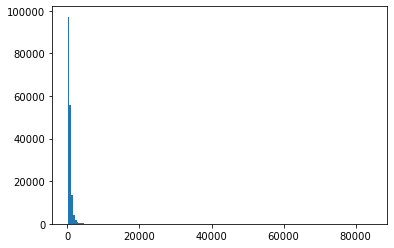

In [20]:
# plotting duration second on a standard scale
bins= np.arange(61,df['duration_sec'].max()+500,500)
plt.hist(data=df, x='duration_sec',bins=bins);

there's a long tail in the distribution, so I'll put it on a log scale 

Text(0.5, 0, 'duration (seconed)')

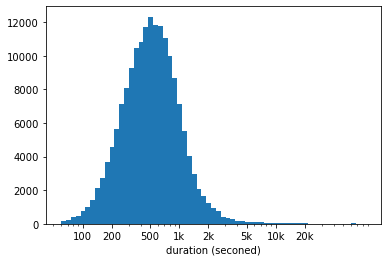

In [21]:
# put duration second on a log scale to handle the skweed tails
log_binsize = 0.05
bins = 10** np.arange(1.78, np.log10(df['duration_sec'].max())+log_binsize,log_binsize)

plt.hist(data=df, x='duration_sec', bins=bins);
plt.xscale('log')
plt.xticks([100,200,500, 1e3, 2e3, 5e3,1e4,2e4], [100,200,500, '1k', '2k', '5k','10k','20k'])
plt.xlabel('duration (second)')

duration second has a long tailed distribution with low trips with high duration second when plotted the duration second on log scale the distribution looks unimodel with one peak on 400 and 700 that mean average duration of most trips is about 400 to 700 second approximately 8 to 11 minutes

In [22]:
# order the most popular start stations 
start_station_counts = df['start_station_name'].value_counts()
start_station_order = start_station_counts.index[:5]
start_station_counts

Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                           2952
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2620
                                                             ... 
Willow St at Vine St                                            9
Parker Ave at McAllister St                                     7
21st Ave at International Blvd                                  4
Palm St at Willow St                                            3
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

In [23]:
# order the most popular end stations 
end_station_counts = df['end_station_name'].value_counts() 
end_station_order = end_station_counts.index[:5]
end_station_counts

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4624
Market St at 10th St                                         3709
Montgomery St BART Station (Market St at 2nd St)             3461
San Francisco Ferry Building (Harry Bridges Plaza)           3151
San Francisco Caltrain (Townsend St at 4th St)               2870
                                                             ... 
Parker Ave at McAllister St                                     9
Palm St at Willow St                                            7
16th St Depot                                                   6
Willow St at Vine St                                            5
21st Ave at International Blvd                                  5
Name: end_station_name, Length: 329, dtype: int64

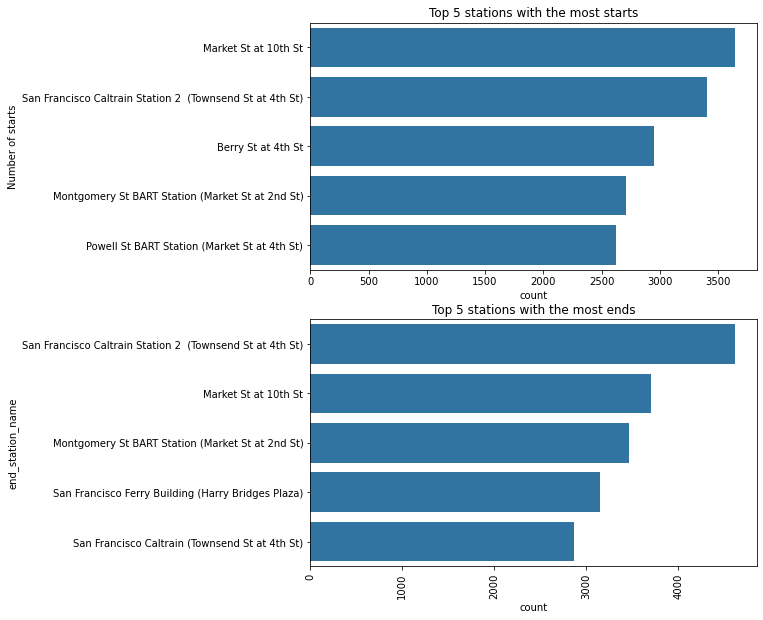

In [24]:
#explore the most start station
plt.figure(figsize=[8,10])
base_color = sb.color_palette()[0]
plt.subplot(2,1,1)
sb.countplot(data=df, y='start_station_name', color=base_color, order=start_station_order)
plt.ylabel('Number of starts')
plt.title('Top 5 stations with the most starts');

#plot the most ends station 
plt.subplot(2,1,2)
sb.countplot(data=df, y='end_station_name', color= base_color, order=end_station_order)
plt.xticks(rotation=90)
plt.title('Top 5 stations with the most ends');

#### - Top station with most starts is : Market St at 10th St (3649 times of start)
#### - Top station with most ends is :San Francisco Caltrain Station 2 (4624 times of ends )


In [25]:
#make new column for all trips combine start station and end station
df['trips'] = df['start_station_name']+ ' & ' + df['end_station_name']

In [26]:
#explore number of trips 
trips_counts = df['trips'].value_counts()
trips_order = trips_counts.index[:10]


Text(0.5, 1.0, 'Most Popular Trips')

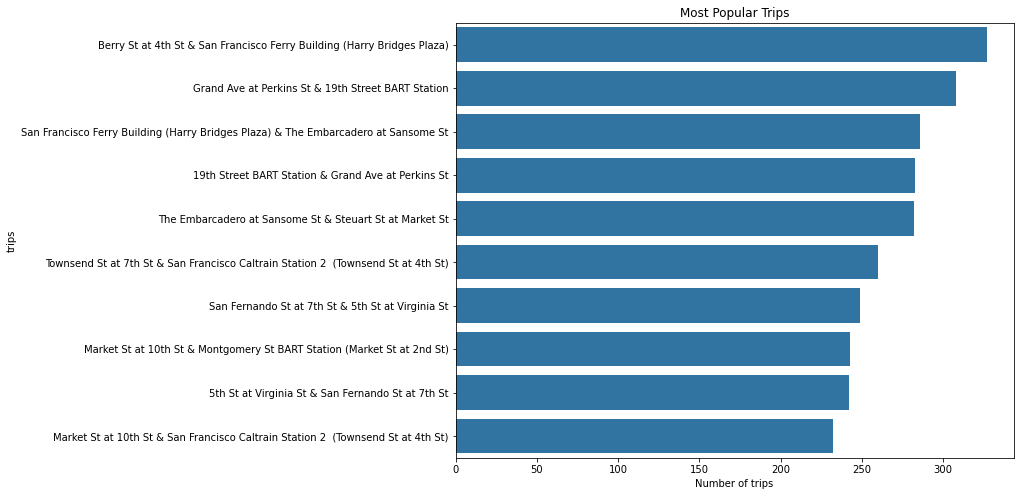

In [27]:
#plot the most popular trips 
plt.figure(figsize=[10,8])
base_color = sb.color_palette()[0]
sb.countplot(data=df, y='trips', color= base_color, order=trips_order)
plt.xlabel('Number of trips')
plt.title('Most Popular Trips')

**Most popular trips by number of trips is:Berry St at 4th St & San Francisco Ferry Building (327 trips)**

In [28]:
#make sub data for only the main two gender female and male
df_sub = df.loc[df['member_gender'].isin(['Male','Female'])]
df_sub.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,trips
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,Montgomery St BART Station (Market St at 2nd S...
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,Market St at Dolores St & Powell St BART Stati...
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,Frank H Ogawa Plaza & 10th Ave at E 15th St
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,4th St at Mission Bay Blvd S & Broadway at Kearny
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No,Palm St at Willow St & San Jose Diridon Station


Text(0.5, 1.0, 'the most member gender ')

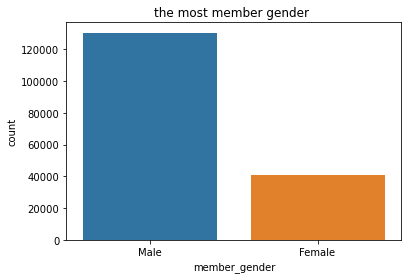

In [29]:
# explore which is the most gender in members
sb.countplot(data=df_sub, x='member_gender')
plt.title('the most member gender ')

**Most members gender is Males (130500 member )**

Text(0.5, 1.0, 'Most popular user type ')

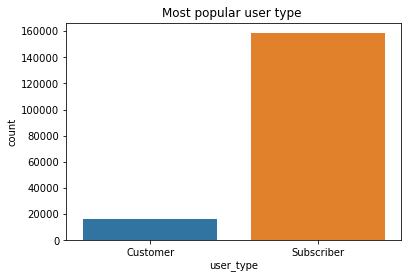

In [30]:
# explore the most popular user type customers and subscribers
sb.countplot(data=df, x='user_type')
plt.title('Most popular user type ')

**Most popular user type is Subscribers (158386 user)**

In [31]:
# explore the most popular bikes by number of times used 
bikeid_counts = df['bike_id'].value_counts()
bikeid_ordered = bikeid_counts.index[:5]

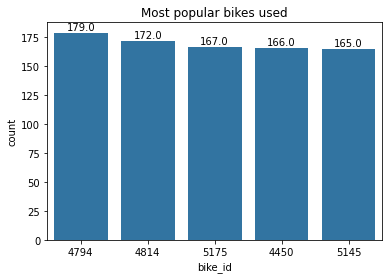

In [54]:
#plot the most popular bikes by number of times used 
color_base = sb.color_palette()[0]
sb.countplot(data=df , x='bike_id',color = color_base, order = bikeid_ordered )
plt.title('Most popular bikes used')
locs, labels = plt.xticks() 
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = bikeid_counts[label.get_text()]
    pct_string = '{:0.1f}'.format(count)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

- **the most popular bike by number of times used : bike 4797(179 times)**
- lets explore the most popular bike by number of seconds used


In [33]:
# extract hour from the Start Time column to create an hour column
df['hour']= df['start_time'].dt.hour
hour_counts = df['hour'].value_counts()
hour_ordered = hour_counts.index[:5]
hour_ordered

df['end_hour']= df['end_time'].dt.hour
endhour_counts = df['end_hour'].value_counts()
endhour_ordered = endhour_counts.index[:5]


Text(0.5, 1.0, 'the most popular time of the day trips ended in it')

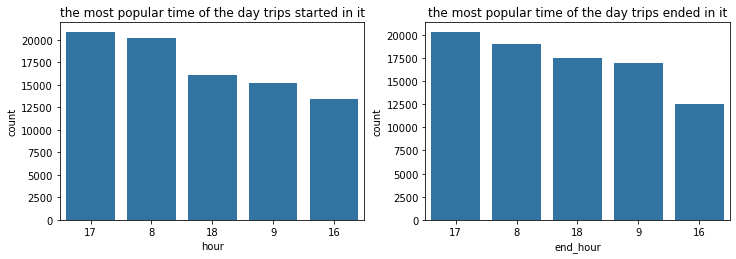

In [34]:
#plot the most popular start hour
plt.figure(figsize= [12,8])
plt.subplot(2,2,1)
color_base = sb.color_palette()[0]
sb.countplot(data = df, x='hour', color= color_base, order=hour_ordered )
plt.title('the most popular time of the day trips started in it')

plt.subplot(2,2,2)
sb.countplot(data = df, x='end_hour', color= color_base, order=endhour_ordered )
plt.title('the most popular time of the day trips ended in it')

- as we can see the most popular times of the day trips starts and ends in are : 5 PM, 8AM, 6PM, 9AM, 4PM
- so most customers and subscribers prefer to use bikes in the earlier times of morning and afternoon times.

In [35]:
# extract day from the Start Time and end time columns to create day columns
df['day']= df['start_time'].dt.day
day_counts = df['day'].value_counts()
day_ordered = day_counts.index[:5]


df['end_day']= df['end_time'].dt.day
endday_counts = df['end_day'].value_counts()
endday_ordered = endday_counts.index[:5]
endday_ordered

Int64Index([28, 20, 21, 19, 7], dtype='int64')

Text(0.5, 1.0, 'the most popular end trips in day of week')

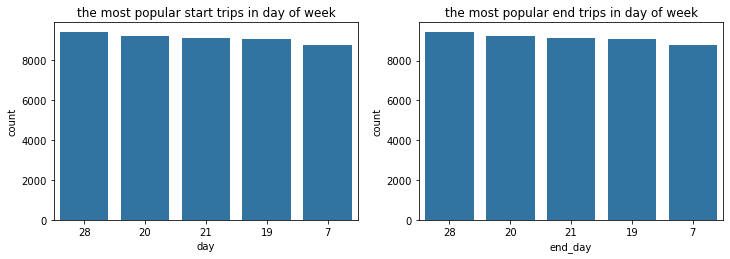

In [36]:
#plot the most popular day in start time
plt.figure(figsize= [12,8])

plt.subplot(2,2,1)
color_base = sb.color_palette()[0]
sb.countplot(data = df, x='day',color = color_base, order=day_ordered )
plt.title('the most popular start trips in day of week' )

plt.subplot(2,2,2)
color_base = sb.color_palette()[0]
sb.countplot(data = df, x='end_day',color = color_base, order=day_ordered )
plt.title('the most popular end trips in day of week' )


**as we can see most popular trips take place in 28-02-2019 and 21-02-2019 and 19-02-2019 Which falls on Thursdays or every week that mean most trips taken in thursdays**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> the duration second distribution looked skewed so I looked at data using a log transformation, uder the transformation the data looked unimodel with one peak between 500 and 700 seconds.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I changed column type with dates to datetime type to can use the data in these columns 
then convert start_station_id and end_station_id to strings because these columns not do any calculationin it it's just ids for station names so I changed their types. also drop the null values it looks not large so I used dropna to drop it from data


## Bivariate Exploration

> In this section, I will investigate the interaction between categories variables and numeric variable ( duration_Sec).

first I will figure out Most popular trips based on average duration in second.
 

In [56]:
#calculate the sum of duration seconds used in every trip 
trips_df =  df.groupby('trips')['duration_sec'].sum()
trips_df =  trips_df.reset_index(name= 'seconds_used')
trips_df_ordered = trips_df.sort_values('seconds_used', ascending = False)[:5]
trips_df_ordered

,trips,seconds_used
9397,Fell St at Stanyan St & Fell St at Stanyan St,390598
5861,Berry St at 4th St & San Francisco Ferry Build...,207316
16432,Page St at Scott St & Page St at Scott St,186337
18835,San Francisco Ferry Building (Harry Bridges Pl...,156497
20762,The Embarcadero at Sansome St & The Embarcader...,151841


Text(0.5, 1.0, 'Most popular trips by seconds used')

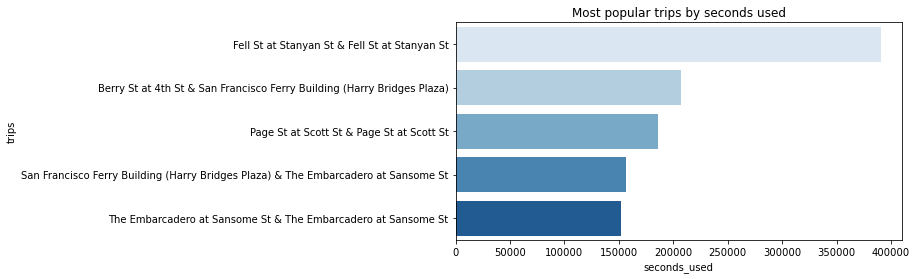

In [55]:
#plot the most popular trips based on seconds used
plt.figure(figsize=[8,4])
base_color = sb.color_palette()[0]
sb.barplot(data= trips_df_ordered, y='trips', x ='seconds_used',palette = 'Blues')
plt.title('Most popular trips by seconds used')

**Most popular trips by seconed used is : Fell St at Stanyan St & Fell St at Stanyan St (390598 seconds used)**

I will figure out Most popular bikes by number of seconds used.
 

In [49]:
#Explore the most popular bikes by number of seconds used
bikes_df =  df.groupby('bike_id')['duration_sec'].sum()
bikes_df =  bikes_df.reset_index(name= 'seconds_used')
bikes_df_ordered = bikes_df.sort_values('seconds_used', ascending = False)[:5]
bikes_df_ordered

,bike_id,seconds_used
3248,5481,214351
3074,5282,197653
3330,5561,184408
2766,4964,177069
2537,4714,172080


Text(0.5, 1.0, 'Most popular bikes by number of seconds used')

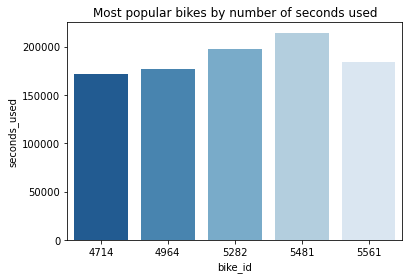

In [52]:
#plot the most popular bikes by number of seconds used
defualt_color = sb.color_palette()[0]
sb.barplot(data= bikes_df_ordered, x='bike_id', y='seconds_used', palette = 'Blues_r')
plt.title('Most popular bikes by number of seconds used')

**Most popular bike by number of seconds used is : Bike 5481 (214351 seconds used)**


at final I will extract Average trip duration based on user type.


Text(0, 0.5, 'Avg duration in (second)')

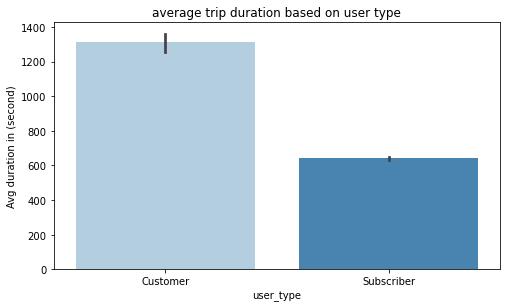

In [41]:
#plot average duration in seconds based on the user type
plt.figure(figsize=[8,10])
defualt_color = sb.color_palette()[0]

plt.subplot(2,1,2)
sb.barplot(data = df, x='user_type', y='duration_sec', palette = 'Blues')
plt.title('average trip duration based on user type')
plt.ylabel('Avg duration in (second)')


- looking at the above plots it seems the customers using bikes longer than the subscribers despite of number of customer users less than subscriber users 



### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>  There was an interesting relationship observed between count of trips and duration by seconds where when I plotted the trips depends on the number of seconds used to determine which is the most popular trips. the most popular trip changed from that I investigated previously in univraite exploration.

> also an interesting relationship observed when investigating the effect of duration by seconds on bikes used where observed new bikes used different from the previously investigating when using just the count of bike used to determine which is the most used.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I didn't observed any intersting relatioships between the other feature. I just focused in features that I interested in .


## Multivariate Exploration

> I will extened my investigation to see if the gender type of the customers or subsctibers effect on the average duration of using bikes

Text(0.5, 1.0, 'average trip duration based on user type and gender type')

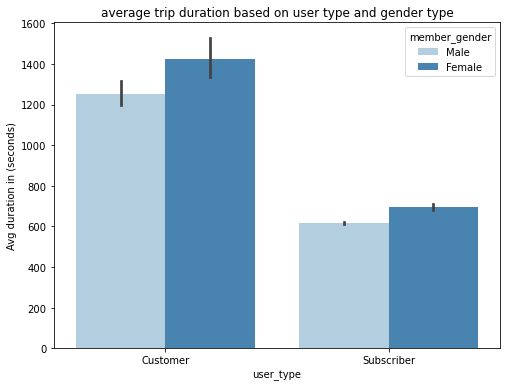

In [42]:
#plot average duration in seconds based on the user type and gender type
plt.figure(figsize=[8,6])
sb.barplot(data= df_sub, x= 'user_type', y='duration_sec',hue='member_gender',palette = 'Blues')
plt.ylabel('Avg duration in (seconds)')
plt.title('average trip duration based on user type and gender type');

**as we can see that females customers using  bikes longer than male custmers 
and aslo females subscribers using  bikes longer than male subscribers which is mean females used bikes more than males** 


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I extended my investigation of average duration in seconds and user type ny looking at the impact of members gender. the multivariate exploration here showed that there indeed is a positive effect of average duration used where females customers using bikes longer than male custmers and aslo females subscribers using bikes longer than male subscribers which is mean females used bikes more than males.

### Were there any interesting or surprising interactions between features?

> there weren't any interesting interactions between features